In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data files and store it in Panda DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data files and store it in Panda DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [6]:
# Combine the data into a single data set
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
sum_ride_id = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_ride_id

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [8]:
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [9]:
sum_ride_id = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_ride_id

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [10]:
#Get the sum of the fares for each type of city.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [11]:
## Module Challeng Part 1

In [12]:
# Total Drivers
sum_drivers = city_data_df.groupby("type").sum()["driver_count"]
sum_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [13]:
# Total Rides
sum_ride_id

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [14]:
# Total Fares
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [15]:
#Find Average per ride
average_per_ride = sum_fares_by_type / sum_ride_id
average_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [16]:
# Find average per driver
average_per_driver = sum_fares_by_type / sum_drivers
average_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [47]:
#Create a new dataframe
summary_df = pd.DataFrame({"Total_Rides" : sum_ride_id,
                           "Total Drivers" : sum_drivers, 
                           "Total_Fares" : sum_fares_by_type, 
                           "Average Fare per Ride" : average_per_ride,
                           "Average Fare per Driver" : average_per_driver})
summary_df

,Total_Rides,Total Drivers,Total_Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [19]:
## Module Challenge Part 2

In [20]:
# Combine the data into a single data set
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
#df.rename(columns={"A": "a", "B": "c"})
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True) 
   
pyber_data_df.rename(columns = {"city": "City", "date": "Date","fare": "Fare","ride_id": "Ride Id",
                                         "driver_count": "No. Drivers", "type": "City Type"}, inplace = True)

pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [22]:
pyber_data_df_new = pyber_data_df.copy()

In [23]:
#Create a new dataframe with date, city type and fare
# df.drop(['C', 'D'], axis = 1)
pyber_data_df_new = pyber_data_df_new.drop(["Ride Id", "No. Drivers"], axis = 1)
pyber_data_df_new

,City,Date,Fare,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,Urban
4,South Jack,2019-03-06 04:28:35,34.58,Urban
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,Rural


In [24]:
pyber_data_df_new["Date"] = pd.to_datetime(pyber_data_df_new["Date"], infer_datetime_format=False)
pyber_data_df_new["Date"].dtype

dtype('<M8[ns]')

In [25]:
pyber_data_df_new = pyber_data_df_new.set_index("Date")

In [26]:
pyber_data_df_new

,City,Fare,City Type
Date,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,Urban
2019-03-04 18:24:09,South Michelleport,30.24,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,Urban
2019-03-06 04:28:35,South Jack,34.58,Urban
...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,Rural
2019-02-10 21:03:50,North Jaime,11.11,Rural


In [27]:
pyber_data_df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       2375 non-null   object 
 1   Fare       2375 non-null   float64
 2   City Type  2375 non-null   object 
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [28]:
pyber_sum = pyber_data_df_new.groupby(["City Type", "Date"]).sum()
pyber_sum.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2375 entries, ('Rural', Timestamp('2019-01-01 09:45:36')) to ('Urban', Timestamp('2019-05-08 13:10:18'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    2375 non-null   float64
dtypes: float64(1)
memory usage: 44.2+ KB


In [29]:
pyber_sum = pyber_sum.reset_index("City Type")
pyber_sum

,City Type,Fare
Date,,
2019-01-01 09:45:36,Rural,43.69
2019-01-02 11:18:32,Rural,52.12
2019-01-03 19:51:01,Rural,19.90
2019-01-04 03:31:26,Rural,24.88
2019-01-06 07:38:40,Rural,47.33
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [30]:
pivot_table_sum = pyber_sum.pivot_table("Fare", "Date", "City Type")
pivot_table_sum

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [31]:
#'2019-01-01':'2019-04-28'
boolean = (pivot_table_sum.index<='2019-04-28')& ('2019-01-01'<= pivot_table_sum.index)

In [32]:
filtered_df_date = pivot_table_sum.loc[boolean]
filtered_df_date

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [33]:
filtered_resample = filtered_df_date.resample("W").sum()
filtered_resample

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<function matplotlib.pyplot.show(*args, **kw)>

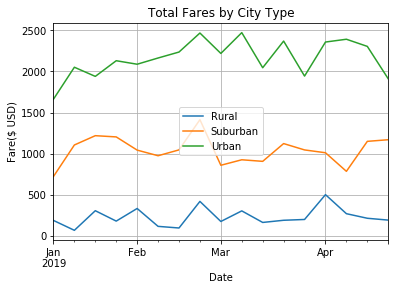

In [56]:
filtered_resample.plot(label='City Type'),plt.figure 
plt.xlabel("Date"),
plt.ylabel("Fare($ USD)"),  
plt.title("Total Fares by City Type"),
plt.colors=["gold","red","orange"],
# Add the legend.
plt.legend()
plt.grid()
plt.savefig("analysis/Fig10.png")
plt.show

In [57]:
# df.style.format("{:.2%}")
pyber_data_df["Fare"] = pyber_data_df["Fare"].map("${:,.2f}".format)
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,$13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,$20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,$11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,$44.94,4256853490277,4,Rural
